In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
from sklearn.preprocessing import MinMaxScaler    
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,f1_score,precision_score,roc_auc_score,roc_curve
from sklearn import metrics

In [2]:
df=pd.read_csv('TCGA-BRCA.htseq_fpkm.tsv',sep='\t')

In [3]:
df.shape

(60483, 1218)

In [4]:
df.head()

,Ensembl_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,ENSG00000242268.2,0.091708,0.000000,0.057899,0.000000,0.000000,0.354334,0.000000,0.000000,0.000000,...,0.234169,0.107850,0.000000,0.000000,0.000000,0.000000,0.471630,0.083825,0.000000,0.061585
1,ENSG00000270112.3,0.019573,0.004701,0.016302,0.000000,0.000000,0.000000,0.005787,0.000000,0.000000,...,0.000000,0.003879,0.010047,0.000000,0.010919,0.000000,0.000000,0.000000,0.005858,0.008704
2,ENSG00000167578.15,2.235898,1.863334,1.704753,1.947481,2.734690,2.397119,2.337327,2.256976,1.968791,...,1.928209,2.004722,2.971522,1.841232,1.185122,2.861514,1.626213,1.692995,2.051916,2.197365
3,ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,2.321945,4.226699,1.975755,2.808757,1.964479,1.792870,1.939951,2.681632,2.091932,...,2.024599,2.216023,2.124097,1.665709,2.217943,2.120565,1.605675,2.055448,2.195782,3.291072


In [5]:
dff =df.reset_index(drop=True)
dff

,Ensembl_ID,TCGA-E9-A1NI-01A,TCGA-A1-A0SP-01A,TCGA-BH-A1EU-11A,TCGA-A8-A06X-01A,TCGA-E2-A14T-01A,TCGA-AC-A8OS-01A,TCGA-A8-A09K-01A,TCGA-OL-A5RY-01A,TCGA-BH-A0DG-01A,...,TCGA-BH-A0DT-11A,TCGA-E9-A1R0-01A,TCGA-BH-A0B6-01A,TCGA-B6-A0RN-01A,TCGA-A8-A09W-01A,TCGA-EW-A1P3-01A,TCGA-A7-A13F-11A,TCGA-A2-A0T6-01A,TCGA-A7-A5ZW-01A,TCGA-BH-A203-01A
0,ENSG00000242268.2,0.091708,0.000000,0.057899,0.000000,0.000000,0.354334,0.000000,0.000000,0.000000,...,0.234169,0.107850,0.000000,0.000000,0.000000,0.000000,0.471630,0.083825,0.000000,0.061585
1,ENSG00000270112.3,0.019573,0.004701,0.016302,0.000000,0.000000,0.000000,0.005787,0.000000,0.000000,...,0.000000,0.003879,0.010047,0.000000,0.010919,0.000000,0.000000,0.000000,0.005858,0.008704
2,ENSG00000167578.15,2.235898,1.863334,1.704753,1.947481,2.734690,2.397119,2.337327,2.256976,1.968791,...,1.928209,2.004722,2.971522,1.841232,1.185122,2.861514,1.626213,1.692995,2.051916,2.197365
3,ENSG00000273842.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,2.321945,4.226699,1.975755,2.808757,1.964479,1.792870,1.939951,2.681632,2.091932,...,2.024599,2.216023,2.124097,1.665709,2.217943,2.120565,1.605675,2.055448,2.195782,3.291072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60478,ENSG00000105063.17,3.680055,3.969785,3.011921,4.059347,4.249147,3.935869,4.082827,3.931459,3.870035,...,3.348868,3.650676,4.478325,3.520017,3.372176,3.772585,3.133380,4.186347,3.340223,3.966532
60479,ENSG00000231119.2,0.285640,0.115149,0.384451,0.345883,0.065679,0.837305,0.198863,0.216728,0.102007,...,0.329875,0.232873,0.069587,0.117933,0.343273,0.149851,0.270187,0.484561,0.127070,0.174248
60480,ENSG00000280861.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60481,ENSG00000123685.7,0.599579,1.382192,0.629043,0.396315,0.157504,0.662529,0.174878,1.724989,0.580636,...,0.487383,0.491877,1.261285,0.407713,0.379536,0.551165,0.611319,0.706170,0.683710,0.430933


In [6]:
df_T= dff.set_index(
    'Ensembl_ID').T.reset_index().rename_axis(None,axis=1).rename(columns= {"index":"Ensembl_ID"})

In [7]:
df_T

,Ensembl_ID,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,TCGA-E9-A1NI-01A,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,...,0.0,0.073008,0.0,0.000000,0.000000,3.680055,0.285640,0.0,0.599579,0.0
1,TCGA-A1-A0SP-01A,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,...,0.0,0.000000,0.0,0.105328,0.055477,3.969785,0.115149,0.0,1.382192,0.0
2,TCGA-BH-A1EU-11A,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.125310,...,0.0,0.039503,0.0,0.092108,0.000000,3.011921,0.384451,0.0,0.629043,0.0
3,TCGA-A8-A06X-01A,0.000000,0.000000,1.947481,0.0,2.808757,4.723270,0.0,0.002361,7.259318,...,0.0,0.118749,0.0,0.000000,0.000000,4.059347,0.345883,0.0,0.396315,0.0
4,TCGA-E2-A14T-01A,0.000000,0.000000,2.734690,0.0,1.964479,3.770091,0.0,0.111647,7.643035,...,0.0,0.000000,0.0,0.113546,0.000000,4.249147,0.065679,0.0,0.157504,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,0.000000,0.000000,2.861514,0.0,2.120565,2.992269,0.0,0.037693,7.673599,...,0.0,0.066625,0.0,0.153477,0.000000,3.772585,0.149851,0.0,0.551165,0.0
1213,TCGA-A7-A13F-11A,0.471630,0.000000,1.626213,0.0,1.605675,3.224406,0.0,0.039177,7.439460,...,0.0,0.017897,0.0,0.180659,0.127060,3.133380,0.270187,0.0,0.611319,0.0
1214,TCGA-A2-A0T6-01A,0.083825,0.000000,1.692995,0.0,2.055448,3.476192,0.0,0.033737,7.138577,...,0.0,0.000000,0.0,0.132664,0.000000,4.186347,0.484561,0.0,0.706170,0.0
1215,TCGA-A7-A5ZW-01A,0.000000,0.005858,2.051916,0.0,2.195782,3.369091,0.0,0.031773,7.446467,...,0.0,0.101503,0.0,0.130170,0.000000,3.340223,0.127070,0.0,0.683710,0.0


In [8]:
df_T.notnull()

,Ensembl_ID,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1213,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1214,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1215,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [9]:
new_df = df_T.loc[:, (df_T!=0).any(axis=0)]


In [10]:
new_df.shape

(1217, 58275)

In [11]:
new_df

,Ensembl_ID,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,TCGA-E9-A1NI-01A,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,...,0.098232,0.073008,0.0,0.000000,0.000000,3.680055,0.285640,0.0,0.599579,0.0
1,TCGA-A1-A0SP-01A,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,...,0.011167,0.000000,0.0,0.105328,0.055477,3.969785,0.115149,0.0,1.382192,0.0
2,TCGA-BH-A1EU-11A,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.125310,...,0.322213,0.039503,0.0,0.092108,0.000000,3.011921,0.384451,0.0,0.629043,0.0
3,TCGA-A8-A06X-01A,0.000000,0.000000,1.947481,0.0,2.808757,4.723270,0.0,0.002361,7.259318,...,0.016356,0.118749,0.0,0.000000,0.000000,4.059347,0.345883,0.0,0.396315,0.0
4,TCGA-E2-A14T-01A,0.000000,0.000000,2.734690,0.0,1.964479,3.770091,0.0,0.111647,7.643035,...,0.034593,0.000000,0.0,0.113546,0.000000,4.249147,0.065679,0.0,0.157504,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,0.000000,0.000000,2.861514,0.0,2.120565,2.992269,0.0,0.037693,7.673599,...,0.021983,0.066625,0.0,0.153477,0.000000,3.772585,0.149851,0.0,0.551165,0.0
1213,TCGA-A7-A13F-11A,0.471630,0.000000,1.626213,0.0,1.605675,3.224406,0.0,0.039177,7.439460,...,0.401469,0.017897,0.0,0.180659,0.127060,3.133380,0.270187,0.0,0.611319,0.0
1214,TCGA-A2-A0T6-01A,0.083825,0.000000,1.692995,0.0,2.055448,3.476192,0.0,0.033737,7.138577,...,0.334910,0.000000,0.0,0.132664,0.000000,4.186347,0.484561,0.0,0.706170,0.0
1215,TCGA-A7-A5ZW-01A,0.000000,0.005858,2.051916,0.0,2.195782,3.369091,0.0,0.031773,7.446467,...,0.199790,0.101503,0.0,0.130170,0.000000,3.340223,0.127070,0.0,0.683710,0.0


In [12]:
df_T1=new_df.drop(columns='Ensembl_ID')

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [14]:
df_T1.head()

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,0.084661,...,0.098232,0.073008,0.0,0.000000,0.000000,3.680055,0.285640,0.0,0.599579,0.0
1,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,0.000000,...,0.011167,0.000000,0.0,0.105328,0.055477,3.969785,0.115149,0.0,1.382192,0.0
2,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.125310,0.461624,...,0.322213,0.039503,0.0,0.092108,0.000000,3.011921,0.384451,0.0,0.629043,0.0
3,0.000000,0.000000,1.947481,0.0,2.808757,4.723270,0.0,0.002361,7.259318,0.088912,...,0.016356,0.118749,0.0,0.000000,0.000000,4.059347,0.345883,0.0,0.396315,0.0
4,0.000000,0.000000,2.734690,0.0,1.964479,3.770091,0.0,0.111647,7.643035,0.066036,...,0.034593,0.000000,0.0,0.113546,0.000000,4.249147,0.065679,0.0,0.157504,0.0


In [15]:
df_T1.shape
df_T1.head()

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000009694.12,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
0,0.091708,0.019573,2.235898,0.0,2.321945,3.620056,0.0,0.337087,7.705589,0.084661,...,0.098232,0.073008,0.0,0.000000,0.000000,3.680055,0.285640,0.0,0.599579,0.0
1,0.000000,0.004701,1.863334,0.0,4.226699,3.546117,0.0,0.016016,6.835508,0.000000,...,0.011167,0.000000,0.0,0.105328,0.055477,3.969785,0.115149,0.0,1.382192,0.0
2,0.057899,0.016302,1.704753,0.0,1.975755,3.396943,0.0,0.041455,7.125310,0.461624,...,0.322213,0.039503,0.0,0.092108,0.000000,3.011921,0.384451,0.0,0.629043,0.0
3,0.000000,0.000000,1.947481,0.0,2.808757,4.723270,0.0,0.002361,7.259318,0.088912,...,0.016356,0.118749,0.0,0.000000,0.000000,4.059347,0.345883,0.0,0.396315,0.0
4,0.000000,0.000000,2.734690,0.0,1.964479,3.770091,0.0,0.111647,7.643035,0.066036,...,0.034593,0.000000,0.0,0.113546,0.000000,4.249147,0.065679,0.0,0.157504,0.0


In [16]:
df_T1.shape

(1217, 58274)

In [17]:
X=df_T1.values
X.shape

(1217, 58274)

In [18]:
type(X)

numpy.ndarray

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [20]:
from sklearn.decomposition import PCA


In [21]:

pca_95=PCA(n_components=.95,random_state=2020)
pca_95.fit(X_scaled)
X_pca_95=pca_95.transform(X_scaled)

In [22]:
X_pca_95.shape

(1217, 878)

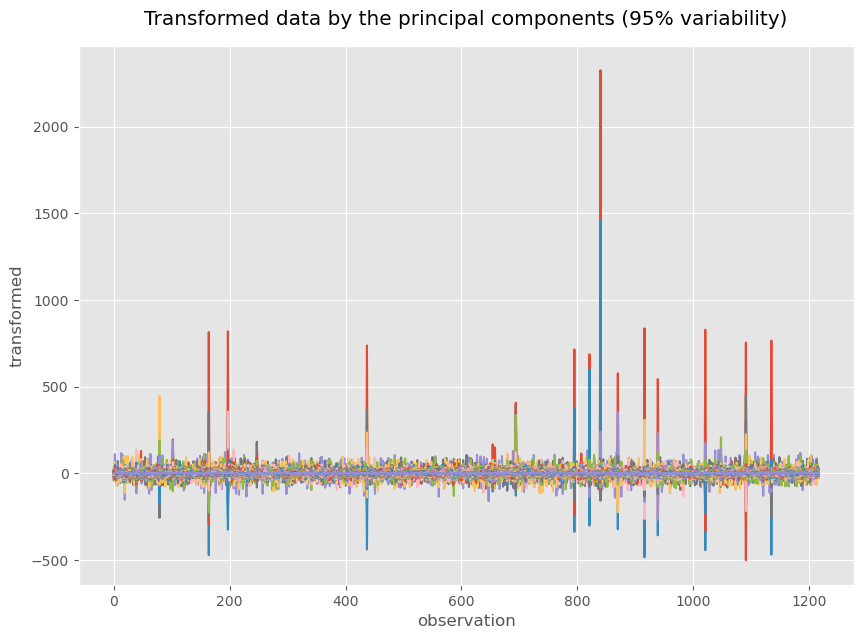

In [23]:
plt.figure(figsize=(10,7))
plt.plot(X_pca_95)
plt.xlabel('observation')
plt.ylabel('transformed')
plt.title('Transformed data by the principal components (95% variability)',pad=15)
plt.savefig('plot.png')

In [24]:
new_pd=pd.DataFrame(X_pca_95)

In [25]:
type(new_pd)

pandas.core.frame.DataFrame

In [26]:
type(df_T)

pandas.core.frame.DataFrame

In [27]:
new_pd.head()

,0,1,2,3,4,5,6,7,8,9,...,868,869,870,871,872,873,874,875,876,877
0,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,-6.655639,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,-4.172990,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,2.120849,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,3.520076,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,20.766795,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382


In [28]:
new_pd.shape

(1217, 878)

In [29]:
type(new_pd)

pandas.core.frame.DataFrame

In [30]:
#adding Ensemble_ID to the dataframe
#df2=new_pd
df1=df_T

In [31]:
#type(df2)

In [32]:
df1.shape

(1217, 60484)

In [33]:
type(df1)


pandas.core.frame.DataFrame

In [34]:
#type(df2)

In [35]:
extracted_col = df1["Ensembl_ID"]
print("column to added from first dataframe to second:")
display(extracted_col)
  


column to added from first dataframe to second:


0       TCGA-E9-A1NI-01A
1       TCGA-A1-A0SP-01A
2       TCGA-BH-A1EU-11A
3       TCGA-A8-A06X-01A
4       TCGA-E2-A14T-01A
              ...       
1212    TCGA-EW-A1P3-01A
1213    TCGA-A7-A13F-11A
1214    TCGA-A2-A0T6-01A
1215    TCGA-A7-A5ZW-01A
1216    TCGA-BH-A203-01A
Name: Ensembl_ID, Length: 1217, dtype: object

In [36]:
new_pd.insert(0, "Ensembl_ID", extracted_col)


In [37]:
new_pd

,Ensembl_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [38]:
new_pd.to_csv("Gene_Expression_data_filtered_with_PCA",index=False)

In [39]:
type(new_pd)

pandas.core.frame.DataFrame

In [40]:
new_pd.head()

,Ensembl_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382


In [41]:
pheno_type=pd.read_csv('brca_tcga_pan_can_atlas_2018_clinical_data.tsv',sep='\t')
pheno_type.shape

(1084, 61)

In [42]:
new_df1 = pheno_type.loc[:, (pheno_type!=0).any(axis=0)]
new_df1.shape

(1084, 60)

In [43]:
# delete the column 'Locations'
subset=new_df1.iloc[:,0:52]
subset

,Study ID,Patient ID,Sample ID,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Aneuploidy Score,Buffa Hypoxia Score,Cancer Type,TCGA PanCanAtlas Cancer Type Acronym,...,Prior Diagnosis,Race Category,Radiation Therapy,Ragnum Hypoxia Score,Number of Samples Per Patient,Sample Type,Sex,Somatic Status,Subtype,Tissue Prospective Collection Indicator
0,brca_tcga_pan_can_atlas_2018,TCGA-3C-AAAU,TCGA-3C-AAAU-01,55,STAGE X,6TH,19.0,-21.0,Breast Cancer,BRCA,...,No,White,No,0.0,1,Primary,Female,Matched,BRCA_LumA,No
1,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALI,TCGA-3C-AALI-01,50,STAGE IIB,6TH,22.0,5.0,Breast Cancer,BRCA,...,No,Black or African American,Yes,18.0,1,Primary,Female,Matched,BRCA_Her2,No
2,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALJ,TCGA-3C-AALJ-01,62,STAGE IIB,7TH,13.0,-5.0,Breast Cancer,BRCA,...,No,Black or African American,No,12.0,1,Primary,Female,Matched,BRCA_LumB,No
3,brca_tcga_pan_can_atlas_2018,TCGA-3C-AALK,TCGA-3C-AALK-01,52,STAGE IA,7TH,4.0,-27.0,Breast Cancer,BRCA,...,No,Black or African American,No,2.0,1,Primary,Female,Matched,BRCA_LumA,No
4,brca_tcga_pan_can_atlas_2018,TCGA-4H-AAAK,TCGA-4H-AAAK-01,50,STAGE IIIA,7TH,7.0,-27.0,Breast Cancer,BRCA,...,No,White,No,-4.0,1,Primary,Female,Matched,BRCA_LumA,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1079,brca_tcga_pan_can_atlas_2018,TCGA-WT-AB44,TCGA-WT-AB44-01,77,STAGE IA,7TH,18.0,-21.0,Breast Cancer,BRCA,...,No,White,Yes,-12.0,1,Primary,Female,Matched,BRCA_LumA,No
1080,brca_tcga_pan_can_atlas_2018,TCGA-XX-A899,TCGA-XX-A899-01,46,STAGE IIIA,7TH,4.0,-37.0,Breast Cancer,BRCA,...,No,White,Yes,-8.0,1,Primary,Female,Matched,BRCA_LumA,No
1081,brca_tcga_pan_can_atlas_2018,TCGA-XX-A89A,TCGA-XX-A89A-01,68,STAGE IIB,7TH,32.0,-31.0,Breast Cancer,BRCA,...,No,White,Yes,-10.0,1,Primary,Female,Matched,BRCA_LumA,No
1082,brca_tcga_pan_can_atlas_2018,TCGA-Z7-A8R5,TCGA-Z7-A8R5-01,61,STAGE IIIA,6TH,21.0,-13.0,Breast Cancer,BRCA,...,Yes,White,No,-16.0,1,Primary,Female,Matched,BRCA_LumA,No


In [44]:
csv2 = subset[['Patient ID', 'Sample ID','Diagnosis Age','Subtype']].copy()
csv2

,Patient ID,Sample ID,Diagnosis Age,Subtype
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01,55,BRCA_LumA
1,TCGA-3C-AALI,TCGA-3C-AALI-01,50,BRCA_Her2
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01,62,BRCA_LumB
3,TCGA-3C-AALK,TCGA-3C-AALK-01,52,BRCA_LumA
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01,50,BRCA_LumA
...,...,...,...,...
1079,TCGA-WT-AB44,TCGA-WT-AB44-01,77,BRCA_LumA
1080,TCGA-XX-A899,TCGA-XX-A899-01,46,BRCA_LumA
1081,TCGA-XX-A89A,TCGA-XX-A89A-01,68,BRCA_LumA
1082,TCGA-Z7-A8R5,TCGA-Z7-A8R5-01,61,BRCA_LumA


In [45]:
subtype_counts= csv2.groupby("Subtype").size().rename("Count").reset_index()
subtype_counts

,Subtype,Count
0,BRCA_Basal,171
1,BRCA_Her2,78
2,BRCA_LumA,499
3,BRCA_LumB,197
4,BRCA_Normal,36


In [46]:
import matplotlib.pyplot as plt

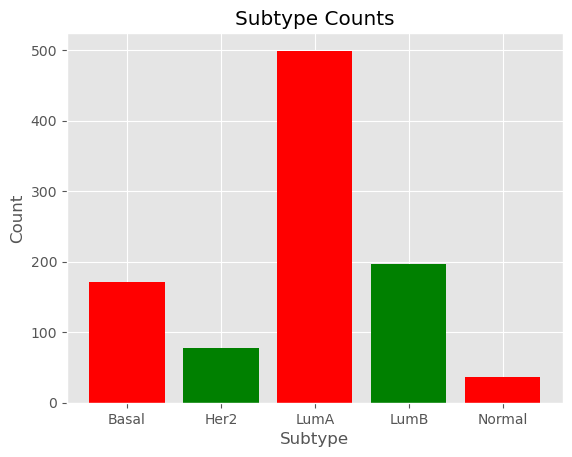

In [47]:
# x-coordinates of left sides of bars
left = [1, 2, 3, 4, 5]

# heights of bars
height = [171, 78, 499, 197, 36]

# labels for bars
tick_label = ['Basal', 'Her2', 'LumA', 'LumB', 'Normal']

# plotting a bar chart
plt.bar(left, height, tick_label = tick_label,
		width = 0.8, color = ['red', 'green'])

# naming the x-axis
plt.xlabel('Subtype')
# naming the y-axis
plt.ylabel('Count')
# plot title
plt.title('Subtype Counts')

# function to show the plot
plt.show()

In [48]:
dff = new_pd.reset_index(drop=True)
dff

,Ensembl_ID,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,TCGA-BH-A1EU-11A,48.989977,-37.832088,110.355854,34.474055,-43.711327,-35.446714,37.926563,-20.313193,-3.041305,...,-1.139597,0.618601,0.642288,-0.615374,-0.065261,1.052749,-0.752691,1.008478,0.265623,0.277148
3,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
4,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1213,TCGA-A7-A13F-11A,5.316579,-20.391401,86.340649,74.292177,-67.606691,14.927459,33.510853,-3.623464,-13.163765,...,-10.094392,0.438917,3.276248,2.419294,-0.470556,-0.218918,2.150400,-2.910560,13.057640,-2.624784
1214,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1215,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [49]:
csv2= csv2.rename(columns={"Sample ID": "Ensembl_ID"})

In [50]:
csv2.Ensembl_ID+="A"
csv2.head()

,Patient ID,Ensembl_ID,Diagnosis Age,Subtype
0,TCGA-3C-AAAU,TCGA-3C-AAAU-01A,55,BRCA_LumA
1,TCGA-3C-AALI,TCGA-3C-AALI-01A,50,BRCA_Her2
2,TCGA-3C-AALJ,TCGA-3C-AALJ-01A,62,BRCA_LumB
3,TCGA-3C-AALK,TCGA-3C-AALK-01A,52,BRCA_LumA
4,TCGA-4H-AAAK,TCGA-4H-AAAK-01A,50,BRCA_LumA


In [51]:
final_data = pd.merge(dff,
    csv2,
    how="inner",
    on="Ensembl_ID")
final_data

,Ensembl_ID,0,1,2,3,4,5,6,7,8,...,871,872,873,874,875,876,877,Patient ID,Diagnosis Age,Subtype
0,TCGA-E9-A1NI-01A,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585,TCGA-E9-A1NI,51,BRCA_LumB
1,TCGA-A1-A0SP-01A,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895,TCGA-A1-A0SP,40,BRCA_Basal
2,TCGA-A8-A06X-01A,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099,TCGA-A8-A06X,77,BRCA_LumB
3,TCGA-E2-A14T-01A,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382,TCGA-E2-A14T,52,BRCA_LumA
4,TCGA-AC-A8OS-01A,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,0.885036,-0.997674,-4.232311,-1.609088,1.542598,-1.289294,3.545640,TCGA-AC-A8OS,71,BRCA_LumA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,TCGA-A8-A09W-01A,-35.639493,14.980486,12.188802,-28.934523,51.412483,54.051818,-6.383594,1.433208,-0.596199,...,1.529693,-5.078013,3.917889,2.096264,-3.443055,-1.858793,4.118271,TCGA-A8-A09W,70,BRCA_LumB
1054,TCGA-EW-A1P3-01A,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032,TCGA-EW-A1P3,48,BRCA_LumA
1055,TCGA-A2-A0T6-01A,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643,TCGA-A2-A0T6,50,BRCA_LumA
1056,TCGA-A7-A5ZW-01A,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547,TCGA-A7-A5ZW,47,BRCA_LumA


In [52]:
df_ = final_data.drop(columns=["Ensembl_ID", "Patient ID", 
                              "Diagnosis Age"]).set_index("Subtype").reset_index().dropna()
df_.head()

,Subtype,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,BRCA_LumB,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,BRCA_Basal,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,BRCA_LumB,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
3,BRCA_LumA,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
4,BRCA_LumA,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,-0.778942,1.096866,2.290157,0.885036,-0.997674,-4.232311,-1.609088,1.542598,-1.289294,3.545640


In [53]:
df_.shape

(962, 879)

In [54]:
df_ = df_.loc[:, (df_!=0).any(axis=0)]
df_

,Subtype,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,BRCA_LumB,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,BRCA_Basal,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,BRCA_LumB,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
3,BRCA_LumA,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
4,BRCA_LumA,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,-0.778942,1.096866,2.290157,0.885036,-0.997674,-4.232311,-1.609088,1.542598,-1.289294,3.545640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,BRCA_LumB,-35.639493,14.980486,12.188802,-28.934523,51.412483,54.051818,-6.383594,1.433208,-0.596199,...,2.450430,0.101494,-8.780777,1.529693,-5.078013,3.917889,2.096264,-3.443055,-1.858793,4.118271
1054,BRCA_LumA,6.489166,-7.235520,-42.221737,-29.726339,-46.306865,-3.898172,0.273225,-11.825646,10.856366,...,-2.441103,3.151044,1.732881,1.530814,4.475547,1.024294,-0.108426,0.073189,-2.548751,1.994032
1055,BRCA_LumA,-5.774885,-23.128595,56.292485,-5.341560,-7.595230,12.946196,-32.507719,14.397667,5.443082,...,0.664281,-2.068528,0.982695,0.244065,1.405024,1.473265,-1.129238,1.037336,-1.716860,0.348643
1056,BRCA_LumA,-17.067571,5.271614,12.188374,0.383322,-28.450796,11.623725,0.762525,-14.313774,9.854423,...,3.773867,-10.574411,-0.877395,-3.239411,3.415068,-4.726120,-9.486561,2.427405,-7.358984,4.281547


In [55]:
df_.isna()

,Subtype,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1054,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1055,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1056,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
df_.dropna

<bound method DataFrame.dropna of          Subtype          0          1          2          3          4  \
0      BRCA_LumB -24.531531  11.342849 -31.284900 -40.334107  -3.221001   
1     BRCA_Basal -18.524249  34.146728 -18.299911  57.554067  65.110447   
2      BRCA_LumB -30.286895  17.131226 -19.934098 -21.706926  42.293648   
3      BRCA_LumA -19.881249   4.919158 -11.081747 -52.865220   5.392498   
4      BRCA_LumA  20.833886 -31.343962  16.595508   7.288076 -69.033197   
...          ...        ...        ...        ...        ...        ...   
1053   BRCA_LumB -35.639493  14.980486  12.188802 -28.934523  51.412483   
1054   BRCA_LumA   6.489166  -7.235520 -42.221737 -29.726339 -46.306865   
1055   BRCA_LumA  -5.774885 -23.128595  56.292485  -5.341560  -7.595230   
1056   BRCA_LumA -17.067571   5.271614  12.188374   0.383322 -28.450796   
1057   BRCA_Her2  -1.044670   2.672903   0.034207   1.843336  48.415378   

              5          6          7          8  ...        868 

In [57]:
df_.head()

,Subtype,0,1,2,3,4,5,6,7,8,...,868,869,870,871,872,873,874,875,876,877
0,BRCA_LumB,-24.531531,11.342849,-31.284900,-40.334107,-3.221001,24.107890,-1.354993,-0.226497,4.411273,...,13.349517,1.286265,-11.330689,3.592210,-9.023818,0.654795,-3.309716,5.383981,7.601834,-0.114585
1,BRCA_Basal,-18.524249,34.146728,-18.299911,57.554067,65.110447,-18.738916,22.597374,-4.008121,-6.218050,...,0.469065,1.073779,0.332378,1.197291,-0.139218,0.689360,1.421985,1.076078,-0.247203,-0.752895
2,BRCA_LumB,-30.286895,17.131226,-19.934098,-21.706926,42.293648,9.900837,-4.134881,8.502051,-4.512861,...,-0.455481,0.128473,2.405920,1.777981,-1.164835,1.420760,0.790371,-3.056542,0.427610,0.215099
3,BRCA_LumA,-19.881249,4.919158,-11.081747,-52.865220,5.392498,10.919831,12.962152,7.636731,-0.800831,...,-2.175916,-2.258208,1.906113,-0.006597,-0.998470,2.660469,4.459249,-5.025724,-0.527869,1.795382
4,BRCA_LumA,20.833886,-31.343962,16.595508,7.288076,-69.033197,-38.897916,-30.155739,18.453038,2.358383,...,-0.778942,1.096866,2.290157,0.885036,-0.997674,-4.232311,-1.609088,1.542598,-1.289294,3.545640


In [58]:
df_.groupby('Subtype').size().reset_index().rename(columns={0:"Count"})

,Subtype,Count
0,BRCA_Basal,168
1,BRCA_Her2,77
2,BRCA_LumA,490
3,BRCA_LumB,192
4,BRCA_Normal,35


In [59]:
Label= {
    'BRCA_LumA':0,
    'BRCA_LumB':1,
    'BRCA_Her2':2,
    'BRCA_Basal':3,
    'BRCA_Normal':4
}

Labels = {v: k for k, v in Label.items()}

df_['Subtype'].replace(Label, inplace=True)

In [60]:
X = df_.iloc[:,1:-1]

In [61]:
X_array=X.values

In [62]:
y = df_.iloc[:,0]
y

0       1
1       3
2       1
3       0
4       0
       ..
1053    1
1054    0
1055    0
1056    0
1057    2
Name: Subtype, Length: 962, dtype: int64

In [63]:
y_array=y.values
type(y_array)

numpy.ndarray

In [64]:
import torch
X = torch.from_numpy(X_array).type(torch.float)
y = torch.from_numpy(y_array).type(torch.LongTensor)

# View the first five samples
X[:5], y[:5]

(tensor([[-24.5315,  11.3428, -31.2849,  ...,  -3.3097,   5.3840,   7.6018],
         [-18.5242,  34.1467, -18.2999,  ...,   1.4220,   1.0761,  -0.2472],
         [-30.2869,  17.1312, -19.9341,  ...,   0.7904,  -3.0565,   0.4276],
         [-19.8812,   4.9192, -11.0817,  ...,   4.4592,  -5.0257,  -0.5279],
         [ 20.8339, -31.3440,  16.5955,  ...,  -1.6091,   1.5426,  -1.2893]]),
 tensor([1, 3, 1, 0, 0]))

In [65]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)

(769, 193, 769, 193)

In [66]:
X_train.shape

torch.Size([769, 877])

In [67]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [68]:
X_train = torch.from_numpy(X_train).type(torch.float)
y_train = torch.from_numpy(y_train).type(torch.LongTensor)

In [69]:
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))
print("After OverSampling, counts of label '4': {}".format(sum(y_train == 4)))
print("After OverSampling, counts of label '3': {}".format(sum(y_train == 3)))
print("After OverSampling, counts of label '2': {}".format(sum(y_train == 2)))  
print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

After OverSampling, the shape of train_X: torch.Size([1935, 877])
After OverSampling, the shape of train_y: torch.Size([1935]) 

After OverSampling, counts of label '4': 387
After OverSampling, counts of label '3': 387
After OverSampling, counts of label '2': 387
After OverSampling, counts of label '1': 387
After OverSampling, counts of label '0': 387


In [70]:
# Set the hyperparameters for data creation
NUM_CLASSES = 5
NUM_FEATURES = 877
RANDOM_SEED = 42

In [71]:
type(X_train)

torch.Tensor

tensor([[-24.5315,  11.3428, -31.2849,  ...,  -3.3097,   5.3840,   7.6018],
        [-18.5242,  34.1467, -18.2999,  ...,   1.4220,   1.0761,  -0.2472],
        [-30.2869,  17.1312, -19.9341,  ...,   0.7904,  -3.0565,   0.4276],
        [-19.8812,   4.9192, -11.0817,  ...,   4.4592,  -5.0257,  -0.5279],
        [ 20.8339, -31.3440,  16.5955,  ...,  -1.6091,   1.5426,  -1.2893]]) tensor([1, 3, 1, 0, 0])


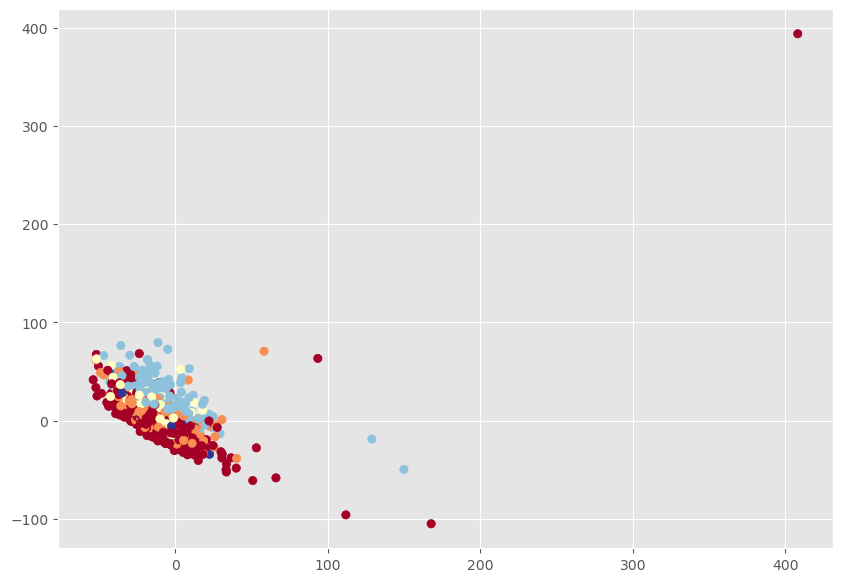

In [72]:
# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);
print(X[:5], y[:5])

In [73]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [74]:
from torch import nn

# Build model
class classificationModel(nn.Module):
    def __init__(self, input_features, output_features):
       
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=877, out_features=512),
            nn.Linear(in_features=512, out_features=256),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=256,out_features=128),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=128,out_features=64), 
            nn.Linear(in_features=64,out_features=5),
            # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_0 = classificationModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES).to(device)
model_0

classificationModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=877, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=5, bias=True)
  )
)

In [75]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), 
                            lr=0.01) # exercise: try changing the learning rate here and seeing what happens to the model's performanc

In [76]:
model_0(X_train.to(device))[:5]

tensor([[ 0.3099,  0.1848, -0.2088,  0.4191, -0.5747],
        [-1.0999,  1.3849, -0.0544,  0.4098,  0.0508],
        [-0.4628,  0.6539,  0.0620,  0.3378,  0.4828],
        [ 0.1111,  0.0033, -0.8742,  0.2616, -0.0326],
        [-0.0804, -0.1245, -0.2538,  0.0525, -0.4446]],
       grad_fn=<SliceBackward0>)

In [77]:

# How many elements in a single prediction sample?
model_0(X_train.to(device))[0].shape, NUM_CLASSES 

(torch.Size([5]), 5)

In [78]:
# Make prediction logits with model
y_logits = model_0(X_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.2492,  0.0996, -0.2097,  0.1967, -0.2994],
        [-0.4979,  0.1693, -0.2710, -0.1879,  0.0034],
        [ 0.1232,  0.2453, -0.4552, -0.8275, -0.2365],
        [-0.6918,  0.4147,  0.2660, -0.1181, -0.5678],
        [ 0.1595, -0.2802,  0.1749, -0.2637, -0.2134]],
       grad_fn=<SliceBackward0>)
tensor([[0.1675, 0.2374, 0.1742, 0.2616, 0.1593],
        [0.1385, 0.2700, 0.1738, 0.1889, 0.2287],
        [0.2649, 0.2993, 0.1486, 0.1024, 0.1849],
        [0.1049, 0.3171, 0.2733, 0.1861, 0.1187],
        [0.2498, 0.1609, 0.2537, 0.1636, 0.1720]], grad_fn=<SliceBackward0>)


In [79]:
# Sum the first sample output of the softmax activation function 
torch.sum(y_pred_probs[0])


tensor(1., grad_fn=<SumBackward0>)

In [80]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1675, 0.2374, 0.1742, 0.2616, 0.1593], grad_fn=<SelectBackward0>)
tensor(3)


In [81]:
y_train.dtype

torch.int64

In [82]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [83]:
torch.manual_seed(42)

# Set number of epochs
epochs = 300
#track
epoch_count=[]
#loss_values=[]
test_loss_values=[]
acc_value=[]
test_acc_value=[]

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_0(X_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 1 == 0:
        epoch_count.append(epoch)
        #loss_values.append(loss)
        test_loss_values.append(test_loss)
        acc_value.append(acc)
        test_acc_value.append(test_acc)
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.66989, Acc: 16.90% | Test Loss: 1.53605, Test Acc: 30.05%
Epoch: 1 | Loss: 1.51083, Acc: 35.81% | Test Loss: 1.45460, Test Acc: 38.34%
Epoch: 2 | Loss: 1.37608, Acc: 54.01% | Test Loss: 1.38421, Test Acc: 41.97%
Epoch: 3 | Loss: 1.25991, Acc: 64.60% | Test Loss: 1.32256, Test Acc: 46.63%
Epoch: 4 | Loss: 1.15884, Acc: 70.70% | Test Loss: 1.26816, Test Acc: 50.26%
Epoch: 5 | Loss: 1.07058, Acc: 74.21% | Test Loss: 1.21990, Test Acc: 53.37%
Epoch: 6 | Loss: 0.99339, Acc: 76.07% | Test Loss: 1.17684, Test Acc: 53.89%
Epoch: 7 | Loss: 0.92577, Acc: 77.88% | Test Loss: 1.13815, Test Acc: 55.44%
Epoch: 8 | Loss: 0.86641, Acc: 79.17% | Test Loss: 1.10308, Test Acc: 57.51%
Epoch: 9 | Loss: 0.81411, Acc: 80.05% | Test Loss: 1.07099, Test Acc: 58.03%
Epoch: 10 | Loss: 0.76781, Acc: 81.40% | Test Loss: 1.04135, Test Acc: 59.59%
Epoch: 11 | Loss: 0.72659, Acc: 82.27% | Test Loss: 1.01373, Test Acc: 61.14%
Epoch: 12 | Loss: 0.68968, Acc: 82.89% | Test Loss: 0.98778, Test Acc: 62.

Epoch: 107 | Loss: 0.08766, Acc: 98.45% | Test Loss: 0.45139, Test Acc: 82.90%
Epoch: 108 | Loss: 0.08648, Acc: 98.45% | Test Loss: 0.45108, Test Acc: 82.90%
Epoch: 109 | Loss: 0.08532, Acc: 98.45% | Test Loss: 0.45078, Test Acc: 82.90%
Epoch: 110 | Loss: 0.08417, Acc: 98.50% | Test Loss: 0.45050, Test Acc: 82.90%
Epoch: 111 | Loss: 0.08305, Acc: 98.60% | Test Loss: 0.45024, Test Acc: 82.90%
Epoch: 112 | Loss: 0.08195, Acc: 98.66% | Test Loss: 0.44999, Test Acc: 82.38%
Epoch: 113 | Loss: 0.08086, Acc: 98.71% | Test Loss: 0.44976, Test Acc: 82.38%
Epoch: 114 | Loss: 0.07980, Acc: 98.71% | Test Loss: 0.44955, Test Acc: 82.38%
Epoch: 115 | Loss: 0.07875, Acc: 98.71% | Test Loss: 0.44935, Test Acc: 82.38%
Epoch: 116 | Loss: 0.07772, Acc: 98.71% | Test Loss: 0.44917, Test Acc: 82.38%
Epoch: 117 | Loss: 0.07671, Acc: 98.76% | Test Loss: 0.44901, Test Acc: 82.38%
Epoch: 118 | Loss: 0.07571, Acc: 98.81% | Test Loss: 0.44885, Test Acc: 82.38%
Epoch: 119 | Loss: 0.07473, Acc: 98.86% | Test Loss:

Epoch: 217 | Loss: 0.02667, Acc: 99.79% | Test Loss: 0.47039, Test Acc: 82.90%
Epoch: 218 | Loss: 0.02645, Acc: 99.79% | Test Loss: 0.47077, Test Acc: 82.90%
Epoch: 219 | Loss: 0.02623, Acc: 99.79% | Test Loss: 0.47114, Test Acc: 82.90%
Epoch: 220 | Loss: 0.02601, Acc: 99.79% | Test Loss: 0.47152, Test Acc: 82.90%
Epoch: 221 | Loss: 0.02580, Acc: 99.79% | Test Loss: 0.47189, Test Acc: 82.90%
Epoch: 222 | Loss: 0.02559, Acc: 99.79% | Test Loss: 0.47227, Test Acc: 83.42%
Epoch: 223 | Loss: 0.02538, Acc: 99.79% | Test Loss: 0.47265, Test Acc: 83.42%
Epoch: 224 | Loss: 0.02517, Acc: 99.79% | Test Loss: 0.47302, Test Acc: 83.42%
Epoch: 225 | Loss: 0.02497, Acc: 99.79% | Test Loss: 0.47340, Test Acc: 83.42%
Epoch: 226 | Loss: 0.02476, Acc: 99.79% | Test Loss: 0.47378, Test Acc: 83.42%
Epoch: 227 | Loss: 0.02456, Acc: 99.79% | Test Loss: 0.47416, Test Acc: 83.42%
Epoch: 228 | Loss: 0.02437, Acc: 99.79% | Test Loss: 0.47454, Test Acc: 83.42%
Epoch: 229 | Loss: 0.02417, Acc: 99.79% | Test Loss:

In [84]:
# Make predictions
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ -2.4963,   9.0948,  -1.1757,   0.2778,  -6.6971],
        [ 10.0954,  -0.2326,  -3.7433,  -6.6193,  -5.3510],
        [  4.6364,  -0.4659,  -0.5283,  -4.8761,  -1.4106],
        [-16.1671,   1.7570,   4.3932,  12.1507,   3.9771],
        [  8.1682,  -1.1463,  -2.2553,  -5.1625,  -3.5683],
        [  6.6996,   0.1021,  -2.2010,  -5.1870,  -3.7578],
        [  2.7004,  -3.5237,  -0.5885,  -2.4332,   2.7971],
        [  4.4774,   5.8768,  -3.6585,  -3.9460,  -6.5396],
        [  7.4663,  -4.9263,   0.5912,  -4.3825,  -0.2664],
        [ -9.0829,  -1.0573,   7.8799,   4.3346,   0.5552]])

In [85]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_test, y_pred=y_preds)}%")


Predictions: tensor([1, 0, 0, 3, 0, 0, 4, 1, 0, 2])
Labels: tensor([1, 0, 0, 3, 0, 0, 0, 0, 0, 2])
Test accuracy: 83.41968911917098%


In [86]:
import seaborn as sns

In [87]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

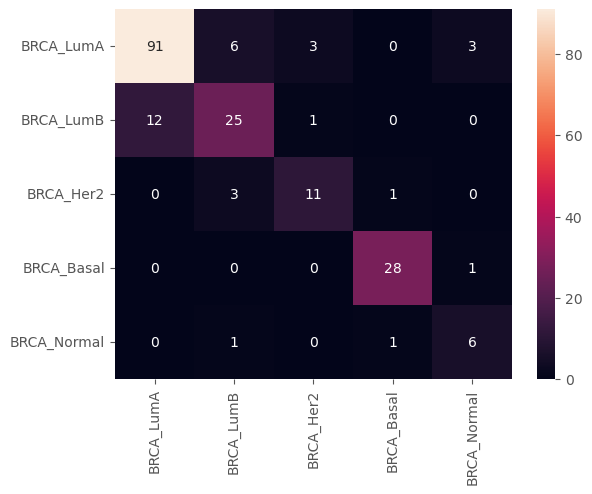

In [88]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_preds)).rename(columns=Labels, index=Labels)

sns.heatmap(confusion_matrix_df, annot=True)

In [89]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       103
           1       0.71      0.66      0.68        38
           2       0.73      0.73      0.73        15
           3       0.93      0.97      0.95        29
           4       0.60      0.75      0.67         8

    accuracy                           0.83       193
   macro avg       0.77      0.80      0.78       193
weighted avg       0.83      0.83      0.83       193



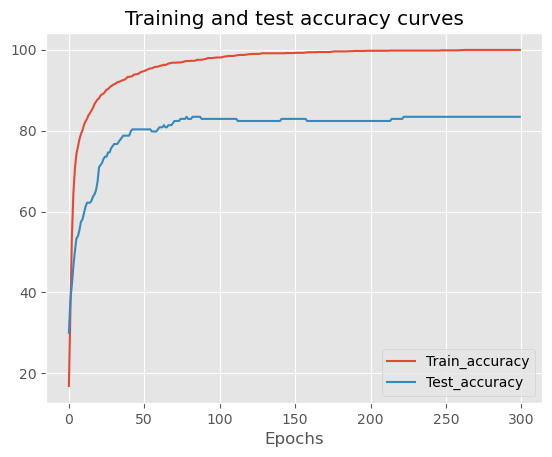

In [90]:
plt.plot(epoch_count,np.array(torch.tensor(acc_value).numpy()),label="Train_accuracy")
plt.plot(epoch_count,np.array(torch.tensor(test_acc_value).numpy()),label="Test_accuracy")
plt.title("Training and test accuracy curves")
plt.xlabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

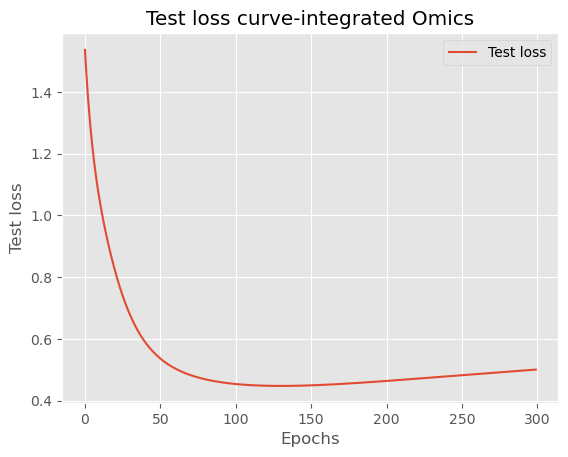

In [91]:
plt.plot(epoch_count,np.array(torch.tensor(test_loss_values).numpy()),label="Test loss")
plt.title("Test loss curve-integrated Omics")
plt.ylabel("Test loss")
plt.xlabel("Epochs")
plt.legend()

In [92]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("C:/Users/jawad/OneDrive/Desktop/Surayya")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path 
MODEL_NAME = "Final_RNAseq gene expression.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH) 

Saving model to: C:\Users\jawad\OneDrive\Desktop\Surayya\Final_RNAseq gene expression.pt


In [93]:
# Instantiate a fresh instance of classificationModel
loaded_model_0 = classificationModel('input_features','output_features')

# Load model state dict 
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_0.to(device)

print(f"Loaded model:\n{loaded_model_0}")
print(f"Model on device:\n{next(loaded_model_0.parameters()).device}")

Loaded model:
classificationModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=877, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): Linear(in_features=64, out_features=5, bias=True)
  )
)
Model on device:
cpu
